BÀI 10: THUẬT TOÁN PHÂN LOẠI K MEANS CLUSTERING VÀ HIERARCHICAL CLUSTERING

A. THUẬT TOÁN PHÂN LOẠI K MEANS CLUSTERING

VÍ DỤ 1: THỰC HÀNH VỚI DATA GIẢ ĐỊNH

In [1]:
# import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

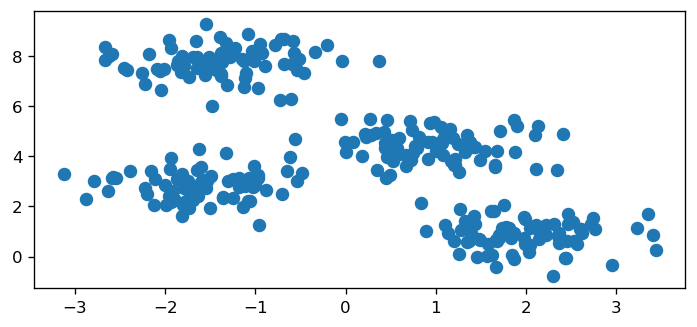

In [2]:
# tạo một cột data có nhóm để thực hành
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:,1], s=50)

In [3]:
X.shape

(300, 2)

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(X)
y_pred = model.predict(X)

c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [6]:
y_pred

array([1, 2, 3, 2, 1, 1, 0, 3, 2, 2, 0, 2, 3, 2, 1, 3, 3, 1, 0, 0, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 3, 2, 2, 3, 2, 2, 2, 2, 2, 0, 1, 3, 0, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 3, 2, 0, 0, 0,
       2, 1, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3,
       2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 3, 0, 2, 1, 2, 1, 3, 1, 1, 3, 2, 3,
       0, 0, 1, 2, 1, 3, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 1, 2, 0, 0, 2, 3, 2, 2, 0, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 3,
       1, 0, 2, 0, 1, 3, 2, 3, 3, 1, 3, 0, 0, 3, 1, 3, 3, 2, 1, 3, 0, 2,
       1, 1, 3, 0, 1, 3, 0, 0, 3, 3, 3, 3, 1, 2, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 2, 3, 0, 1, 0, 3, 2, 0, 2, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 1, 3,
       2, 1, 1, 0, 1, 0, 3, 2, 2, 3, 3, 2, 3, 1, 0, 3, 1, 0, 2, 0, 1, 3,
       1, 2, 2, 2, 2, 0, 0, 2, 3, 0, 1, 3, 0, 0, 0, 1, 1, 2, 3, 3, 0, 1,
       2, 0, 3, 2, 3, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1,
       2, 0, 2, 3, 1, 1, 2, 2, 2, 1, 1, 3, 2, 0])

In [7]:
centers = model.cluster_centers_
centers

array([[-1.58438467,  2.83081263],
       [ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871],
       [ 0.94973532,  4.41906906]])

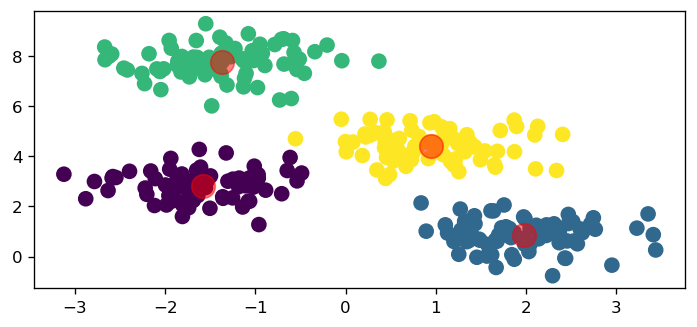

In [8]:
# vẽ hình kết quả

plt.scatter(X[:,0], X[:, 1], c = y_pred, s = 70, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c ='red', s=200, alpha=0.5)

THỰC HÀNH VỚI DATA VỀ PHÂN BÓN KHÁCH HÀNG

In [9]:
link='https://drive.google.com/file/d/1qN48XVbwhFJwRBSDZ1vVAxhAGBFOdNEE/view?usp=sharing'
# Nguồn data https://raw.githubusercontent.com/srafay/Machine_Learning_A-Z/master/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Mall_Customers.csv
#Đọc data
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path,encoding= 'unicode_escape')

In [10]:
df.tail(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [13]:
df['Genre'] = df['Genre'].replace(['Female','Male'],[0,1])

In [14]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [15]:
X = df.iloc[:,1:].values

TÌM GIÁ TRỊ K TỐI ƯU CHO BÀI TOÁN

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

1. Dùng silhouette coefficients

In [22]:
si = []
for k in range(2,20,1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    si.append(score)

c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL

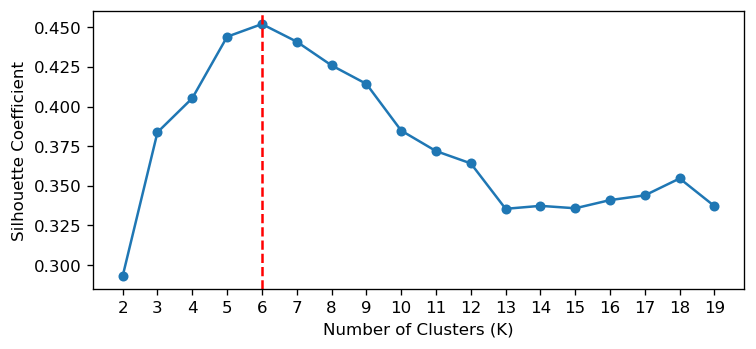

In [24]:
plt.plot(range(2, 20), si,'.-',markersize=10)
plt.xticks(range(2,20))
plt.axvline(x=6, color='r', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.show()

2. Dùng elbow với giá trị wcss

c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memor

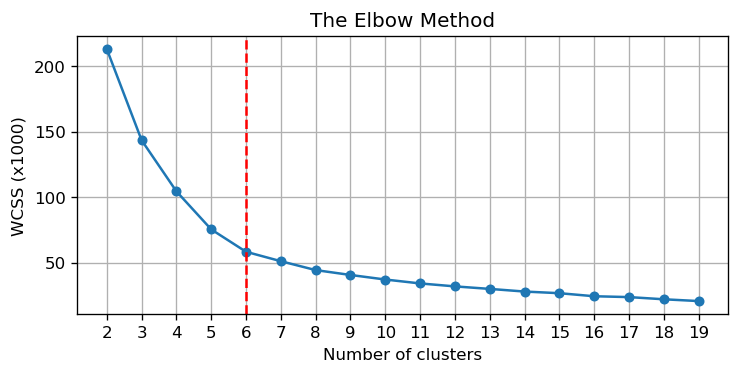

In [25]:
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_/1000)

plt.plot(range(2,20), wcss, '.-', markersize=10)
plt.xticks(range(2, 20))
plt.axvline(x=6, color ='r', linestyle = '--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (x1000)')
plt.grid(linestyle='-')
plt.show()

In [26]:
# Như vậy sau chỉ só test, ta thấy k=6 là phù hợp

In [27]:
kmeans = KMeans(n_clusters=6)
y_pred = kmeans.fit_predict(X)

c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
kmeans.fit(X)

c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6)

In [30]:
a = kmeans.predict([[0,20,30,9]])
a

array([4])

In [31]:
df['Class'] = y_pred

In [32]:
df.sample(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Class
176,177,1,58,88,15,2
44,45,0,49,39,28,5
15,16,1,22,20,79,4
53,54,1,59,43,60,1


<Axes: xlabel='Age', ylabel='Count'>

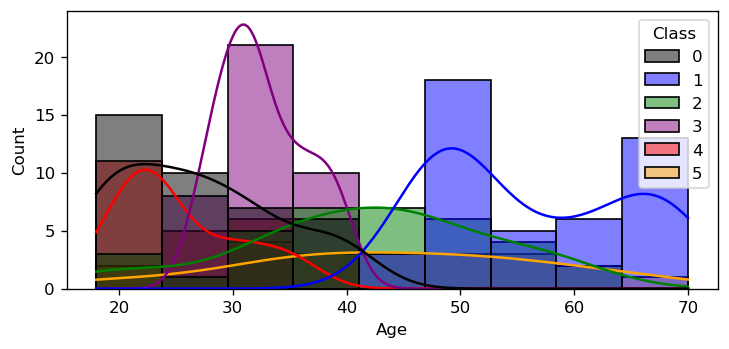

In [38]:
import seaborn as sns
palette = ['black','blue','green','purple','red','orange']
sns.histplot(x='Age',hue='Class', data = df, palette=palette, kde=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

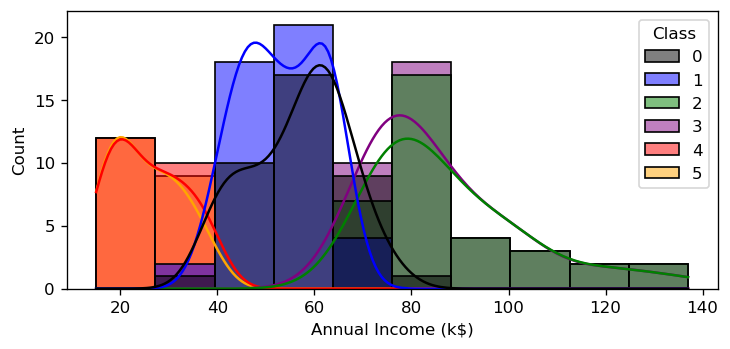

In [39]:
import seaborn as sns
palette = ['black','blue','green','purple','red','orange']
sns.histplot(x='Annual Income (k$)',hue='Class', data = df, palette=palette, kde=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

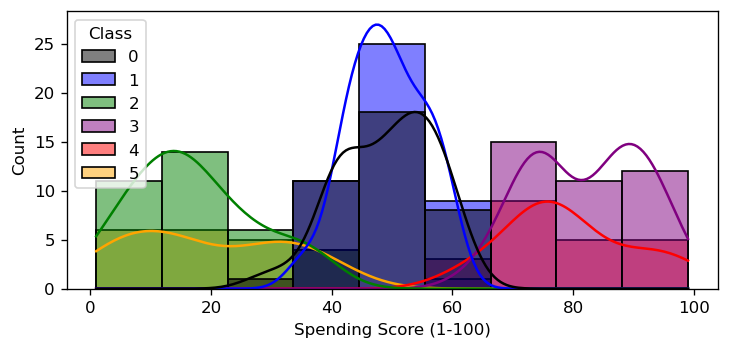

In [40]:
import seaborn as sns
palette = ['black','blue','green','purple','red','orange']
sns.histplot(x='Spending Score (1-100)',hue='Class', data = df, palette=palette, kde=True)

Thuật toán phân loại Hierarchical Clustering

In [41]:
df.drop(columns= ['CustomerID'],inplace=True) # loại bỏ cột id
df.drop(columns=['Class'],inplace=True)

In [42]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df.values) #normalize data cho hàm phía dưới tiện tính toán
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.021780,0.413826,0.326705,0.849433
1,0.011762,0.247008,0.176434,0.952743
2,0.000000,0.760286,0.608229,0.228086
3,0.000000,0.280697,0.195267,0.939723
4,0.000000,0.580683,0.318439,0.749269


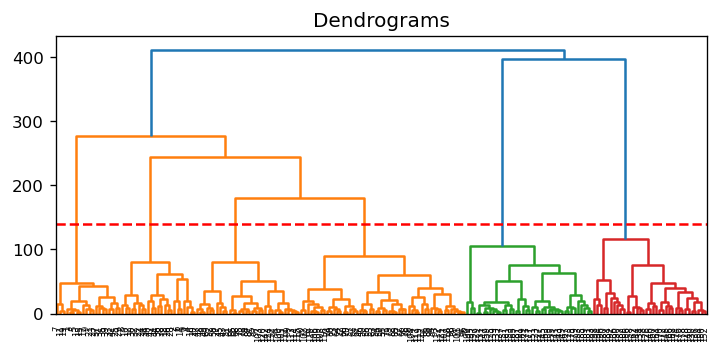

In [43]:
import scipy.cluster.hierarchy as shc
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(df.values, method='ward'))
plt.axhline(y=140, color ='r', linestyle = '--')


In [44]:
# chúng ta có thể chọn k bằng với đường màu đỏ cắt qua các cột avarage

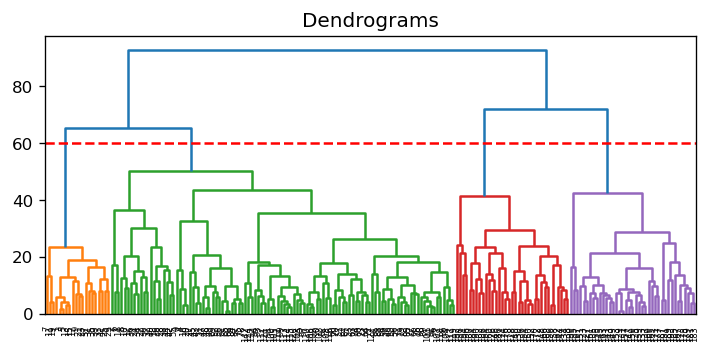

In [45]:
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(df.values, method='weighted'))
plt.axhline(y=60, color = 'r', linestyle = '--')